In [1]:
import geopandas
import pyogrio
import numpy
from shapely.geometry import box
from itertools import product
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg

In [2]:
signatures = pyogrio.read_dataframe(        
    '/home/jovyan/work/urbangrammar_samba/spatial_signatures/'
    'signatures/'
    'signatures_combined_levels_simplified.gpkg',
)

In [3]:
bds = (333000, 385000, 345000, 395000)
sample = signatures.cx[bds[0]:bds[2], bds[1]:bds[3]].clip(box(*bds))

In [4]:
chips = {}

In [5]:
for size in [80, 160, 320, 640]:
    x_coords = numpy.arange(bds[0], bds[2], size)
    y_coords = numpy.arange(bds[1], bds[3], size)
    xs = []
    ys = []
    for x, y in product(x_coords, y_coords):
        xs.append(x)
        ys.append(y)
    chips[size] = geopandas.GeoSeries.from_xy(xs, ys).buffer(size/2, cap_style=3)

In [6]:
cmap = ugg.get_colormap(22, randomize=False)
cols = cmap.colors

symbology = {'0_0': cols[16],
             '1_0': cols[15],
             '3_0': cols[9],
             '4_0': cols[12],
             '5_0': cols[21],
             '6_0': cols[8],
             '7_0': cols[4],
             '8_0': cols[18],
             '2_0': cols[6],
             '2_1': cols[23],
             '2_2': cols[19],
             '9_0': cols[7],
             '9_1': cols[3],
             '9_2': cols[22],
             '9_3': cols[0], # outlier
             '9_4': cols[11],
             '9_5': cols[14],
             '9_6': cols[0], # outlier
             '9_7': cols[0], # outlier
             '9_8': cols[0], # outlier
            }

In [7]:
_, idx = chips[80].sindex.query_bulk(sample.geometry, predicate='contains')

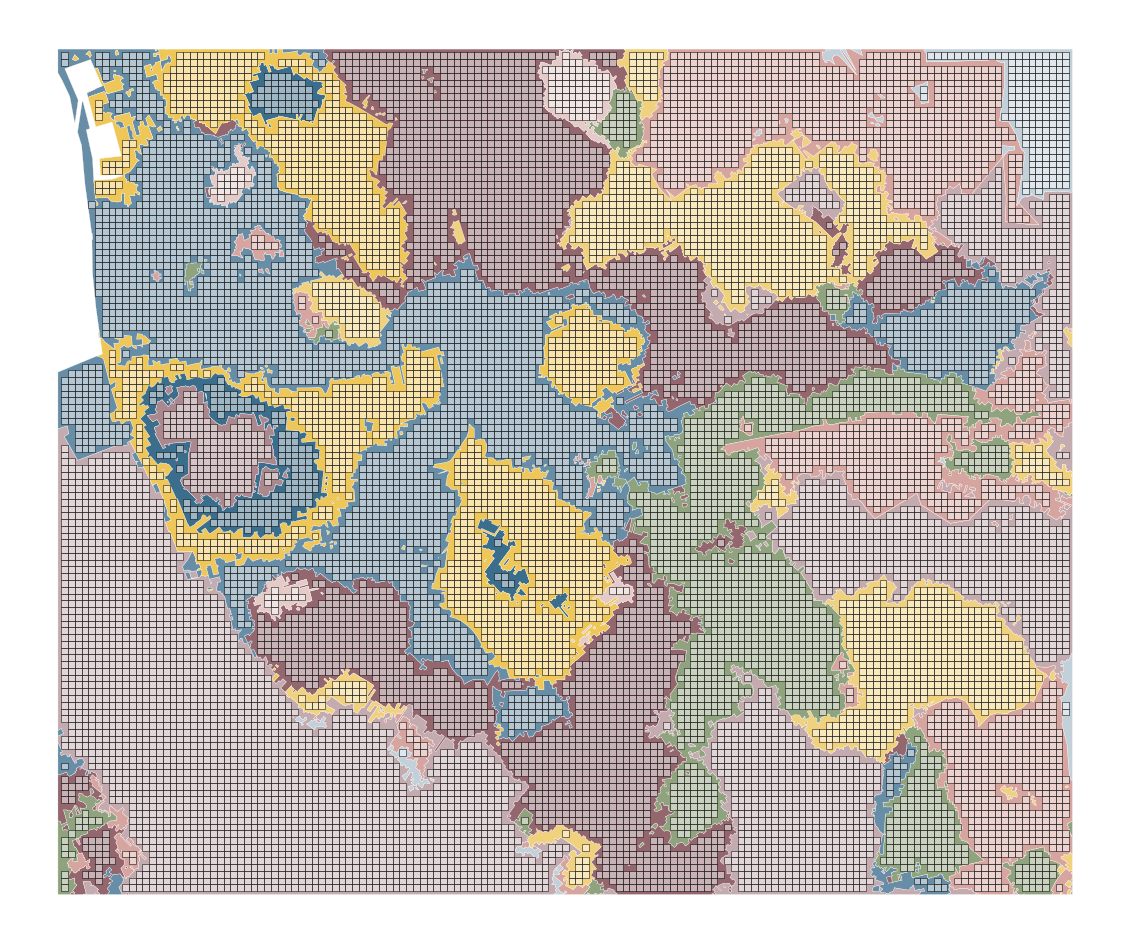

In [8]:
ax = sample.plot(color=sample['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)
chips[80].iloc[idx].plot(ax=ax, color='w', edgecolor='k', alpha=.5)
ax.set_axis_off()
plt.savefig("figs/chips_80.png", bbox_inches="tight")

In [30]:
_, idx = chips[160].sindex.query_bulk(sample.geometry, predicate='contains')

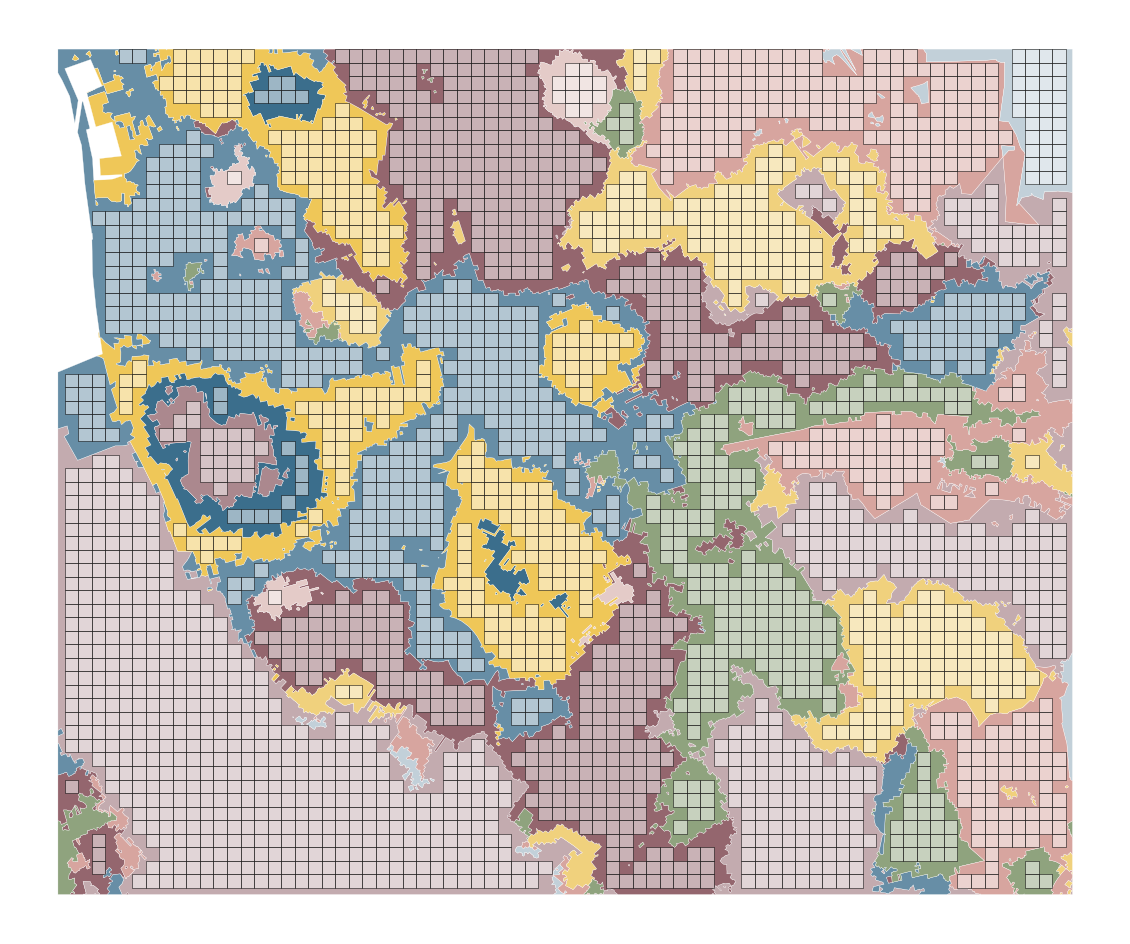

In [37]:
ax = sample.plot(color=sample['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)
chips[160].iloc[idx].plot(ax=ax, color='w', edgecolor='k', alpha=.5)
ax.set_axis_off()
plt.savefig("figs/chips_160.png", bbox_inches="tight")

In [38]:
_, idx = chips[320].sindex.query_bulk(sample.geometry, predicate='contains')

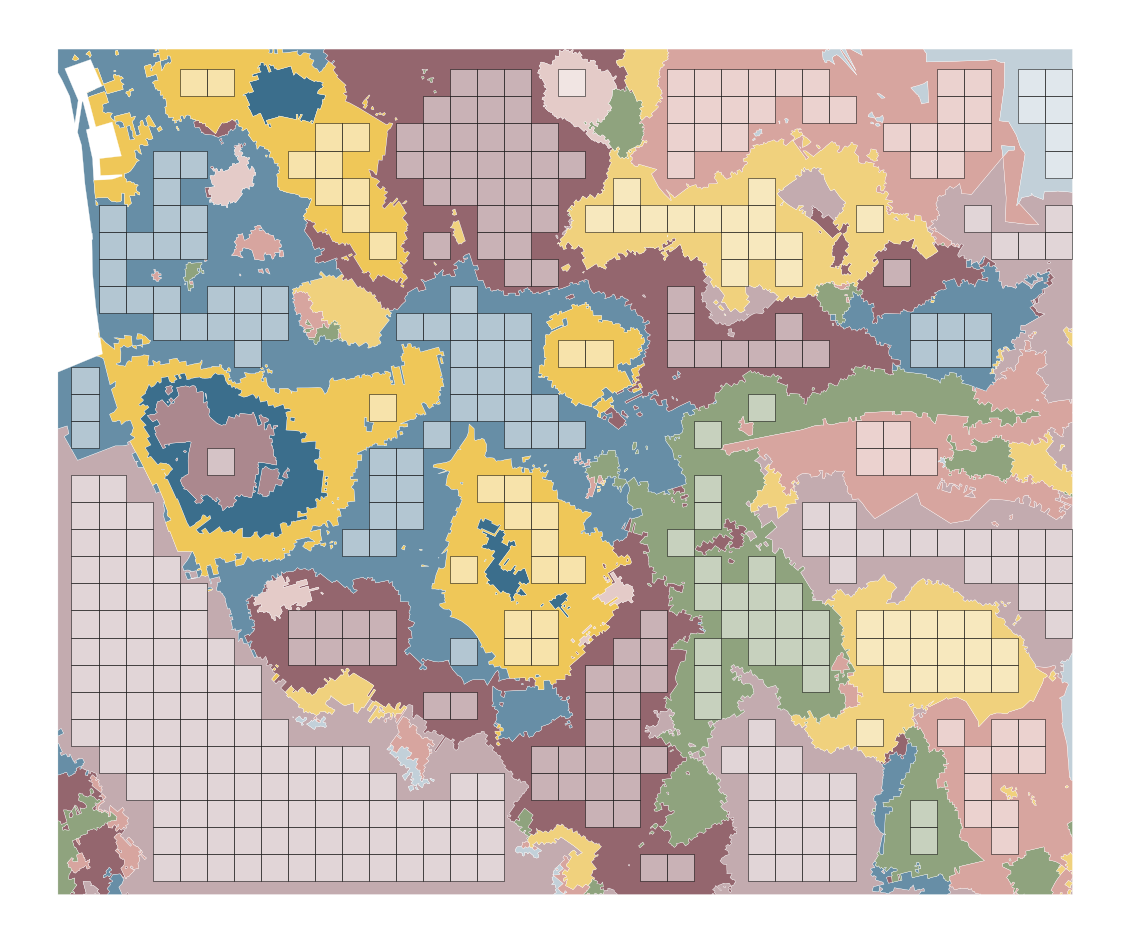

In [41]:
ax = sample.plot(color=sample['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)
chips[320].iloc[idx].plot(ax=ax, color='w', edgecolor='k', alpha=.5)
ax.set_axis_off()
plt.savefig("figs/chips_320.png", bbox_inches="tight")

In [42]:
_, idx = chips[640].sindex.query_bulk(sample.geometry, predicate='contains')

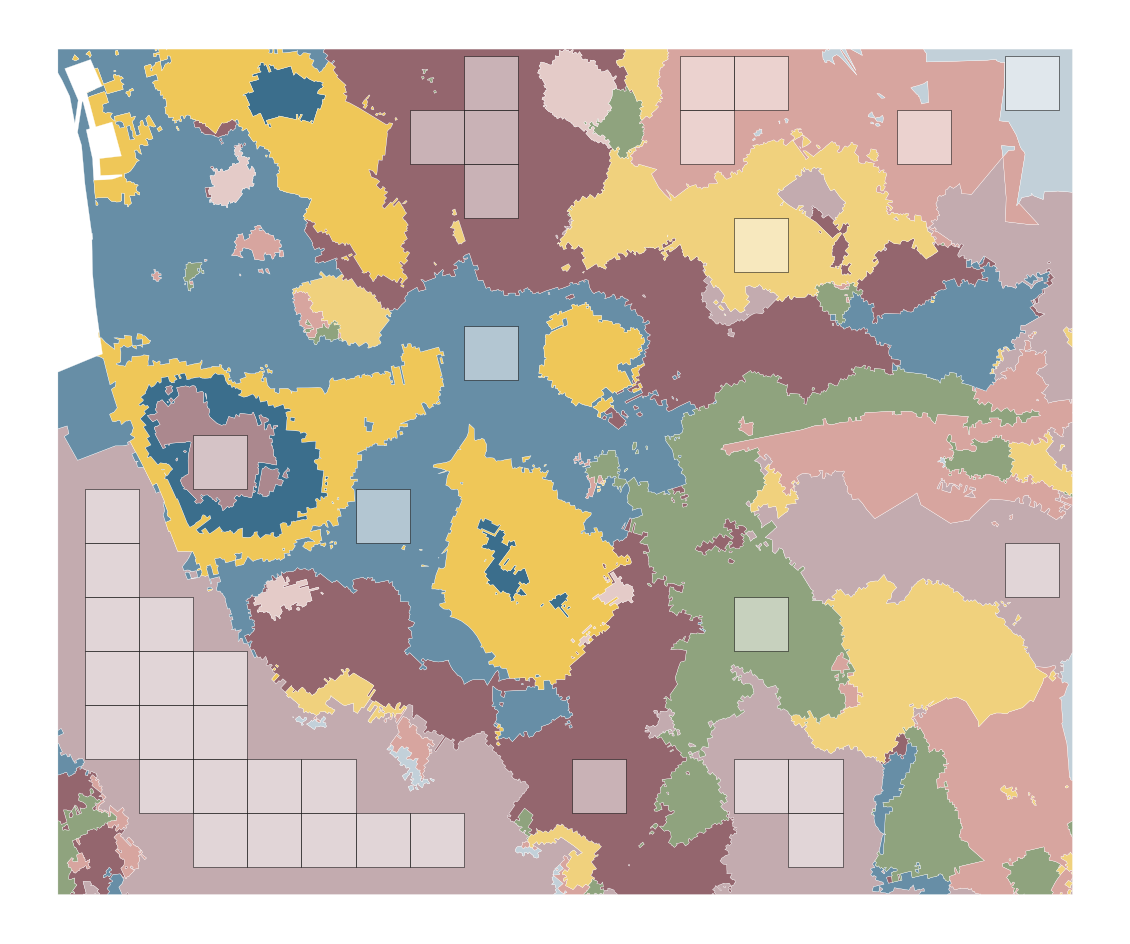

In [45]:
ax = sample.plot(color=sample['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)
chips[640].iloc[idx].plot(ax=ax, color='w', edgecolor='k', alpha=.5)
ax.set_axis_off()
plt.savefig("figs/chips_640.png", bbox_inches="tight")

In [14]:
for size, df in chips.items():
    within = df.sindex.query_bulk(sample.geometry, predicate='contains')[0].shape[0]
    print(f"{size} has {within} chips within, which is {within / df.shape[0]} % of maximum.")

80 has 13760 chips within, which is 0.7338666666666667 % of maximum.
160 has 2718 chips within, which is 0.5752380952380952 % of maximum.
320 has 423 chips within, which is 0.34786184210526316 % of maximum.
640 has 38 chips within, which is 0.125 % of maximum.


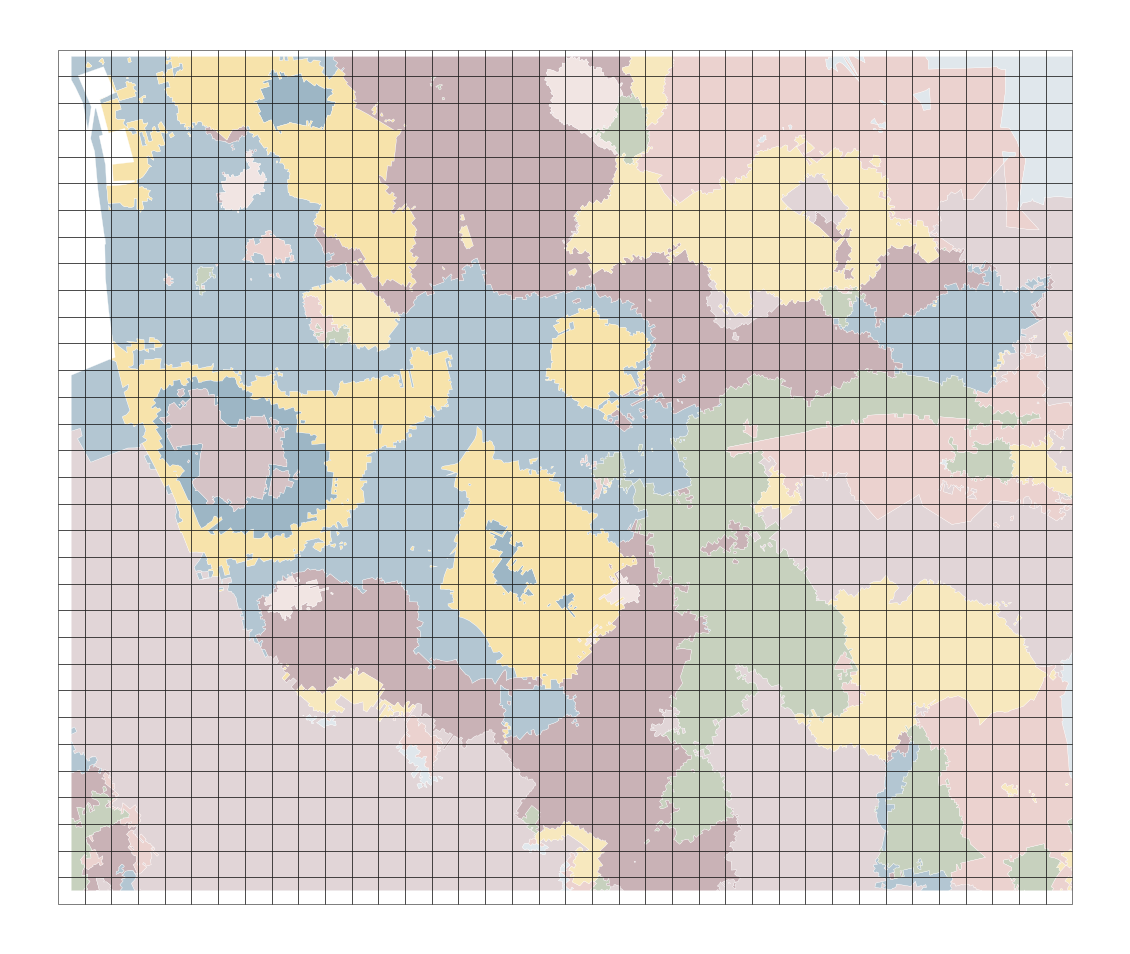

In [17]:
ax = sample.plot(color=sample['signature_type'].map(symbology), figsize=(20, 20), zorder=1, linewidth=.3, edgecolor='w', alpha=1)
chips[320].plot(ax=ax, color='w', edgecolor='k', alpha=.5)
ax.set_axis_off()
plt.savefig("figs/chips_320_all.png", bbox_inches="tight")